# Travelling in the BlockChain Ecosystem with Python

https://towardsdatascience.com/travelling-in-the-blockchain-ecosystem-with-python-47ab5dd0500d

In [1]:
## All CryptoCompare Symbols and Stats
import pandas as pd
import json, urllib.request

In [2]:
# Download Coin Names and Stats from CryptoCompare
# https://min-api.cryptocompare.com/documentation?key=Other&cat=allExchangesV2Endpoint
url = 'https://www.cryptocompare.com/api/data/coinlist/'
data = urllib.request.urlopen(url).read().decode('utf8')
data = json.loads(data)
data = pd.DataFrame(data['Data']).T

# Convert str to int with "N/A" as NaN
data.FullyPremined = data.FullyPremined.apply(pd.to_numeric, errors='coerce') 
data.BuiltOn = pd.to_numeric(data.BuiltOn, downcast='integer', errors='coerce')
data.Id = data.Id.apply(pd.to_numeric, errors='coerce') 
data.SortOrder = data.SortOrder.apply(pd.to_numeric, errors='coerce') 
data.TotalCoinSupply = data.TotalCoinSupply.apply(pd.to_numeric, errors='coerce') 

# Sort by "SortOrder"
data = data.sort_values("SortOrder")
data['BuiltOn'] = data['BuiltOn'].fillna(data['Id'])
data.head()

Id                   Url                   ImageUrl ContentCreatedOn  \
BTC   1182   /coins/btc/overview       /media/19633/btc.png       1417635237   
ETH   7605   /coins/eth/overview  /media/20646/eth_logo.png       1438259812   
LTC   3808   /coins/ltc/overview    /media/35309662/ltc.png       1426004323   
DASH  3807  /coins/dash/overview   /media/33842920/dash.png       1426004252   
XMR   5038   /coins/xmr/overview       /media/19969/xmr.png       1428672055   

      Name Symbol  CoinName        FullName       Algorithm ProofType  ...  \
BTC    BTC    BTC   Bitcoin   Bitcoin (BTC)         SHA-256       PoW  ...   
ETH    ETH    ETH  Ethereum  Ethereum (ETH)          Ethash       PoW  ...   
LTC    LTC    LTC  Litecoin  Litecoin (LTC)          Scrypt       PoW  ...   
DASH  DASH   DASH      Dash     Dash (DASH)             X11   PoW/PoS  ...   
XMR    XMR    XMR    Monero    Monero (XMR)  CryptoNight-V7       PoW  ...   

      TotalCoinSupply  BuiltOn  SmartContractAddress DecimalPlaces  \
BTC        21000000.0   1182.0                   N/A             8   
ETH               0.0   7605.0                   N/A            18   
LTC        84000000.0   3808.0                   N/A             0   
DASH       22000000.0   3807.0                   N/A             0   
XMR               0.0   5038.0                   N/A            12   

     PreMinedValue TotalCoinsFreeFloat SortOrder  Sponsored  \
BTC            N/A                 N/A         1      False   
ETH            N/A                 N/A         2      False   
LTC            N/A                 N/A         3      False   
DASH           N/A                 N/A         4      False   
XMR            N/A                 N/A         5      False   

                                               Taxonomy  \
BTC   {'Access': 'Permissionless', 'FCA': 'Exchange'...   
ETH   {'Access': 'Permissionless', 'FCA': 'Exchange,...   
LTC   {'Access': 'Permissionless', 'FCA': 'Exchange'...   
DASH  {'Access': 'Permissionless', 'FCA': 'Exchange'...   
XMR   {'Access': 'Permissionless', 'FCA': 'Exchange'...   

                                                 Rating  
BTC   {'Weiss': {'Rating': 'A-', 'TechnologyAdoption...  
ETH   {'Weiss': {'Rating': 'A-', 'TechnologyAdoption...  
LTC   {'Weiss': {'Rating': 'B', 'TechnologyAdoptionR...  
DASH  {'Weiss': {'Rating': 'C+', 'TechnologyAdoption...  
XMR   {'Weiss': {'Rating': 'C+', 'TechnologyAdoption...  

[5 rows x 21 columns]

Next, we’ll find the number of token projects per protocol

In [3]:
# Protocol token counts per coin
protocols = pd.merge(pd.DataFrame(data.groupby(['BuiltOn']).size().sort_values(ascending=False)), data[['Id', 'Name']], left_on = 'BuiltOn', right_on = 'Id')
protocols.rename(columns={0: 'Counts', 'Name':'ProtocolSymbol'}, inplace=True)

# For protocol plots below
import numpy as np
protoFlags = np.linspace(.01, .99, len(protocols))
np.random.shuffle(protoFlags)
protocols['Flags'] = protoFlags
protocols = protocols[['Id', 'Counts', 'ProtocolSymbol', 'Flags']].head(30)

# Merge scoring for plots
protocolPlot = pd.merge(data, protocols, right_on = 'Id', left_on = 'BuiltOn', how = 'outer').sort_values("SortOrder")
protocols.head(30)

Id  Counts ProtocolSymbol     Flags
0     7605    2362            ETH  0.356304
1    20131      56          WAVES  0.409582
2     4614      35            XLM  0.767156
3    27368      30            NEO  0.506404
4   166503      22            EOS  0.976168
5     1182      14            BTC  0.861929
6     5292      14            XCP  0.819409
7     1183      14            NXT  0.159075
8     5039      13            BTS  0.230282
9   310829      11            TRX  0.938772
10    5285      11            XEM  0.157026
11  112392       9           QTUM  0.063278
12   22441       7           OMNI  0.292269
13   26132       7            KMD  0.313272
14   30173       4           ARDR  0.427512
15   19745       4            LSK  0.389090
16   20333       3          STEEM  0.813774
17  838328       3             GO  0.255384
18   32699       3            ARK  0.465421
19   28652       3           UBIQ  0.220037
20  204788       3            BNB  0.584783
21  446372       2           ACHN  0.482326
22    5293       2           MAID  0.149341
23   42433       2           PIVX  0.715416
24  166390       2            XTZ  0.429049
25  926064       2           VTHO  0.740518
26    3808       2            LTC  0.726686
27    3807       2           DASH  0.920842
28    5038       2            XMR  0.208766
29    5324       2            ETC  0.380894

We’ll then create a TreeMap to visualize the proportions across different protocols groupings

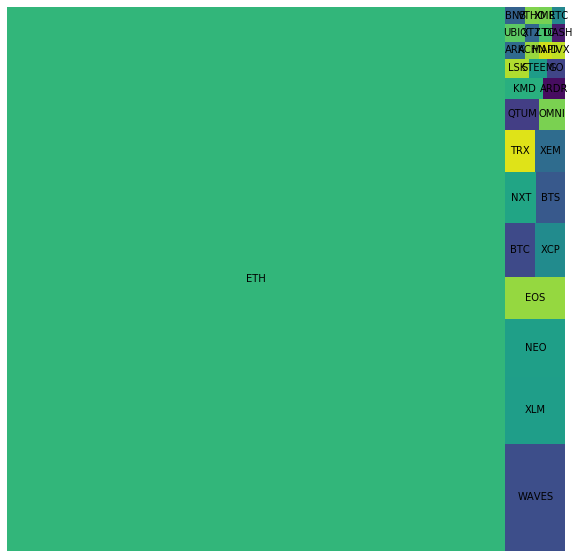

In [4]:
# Tokens per protocol
import matplotlib.pyplot as plt

# Data
names = protocols['ProtocolSymbol'].head(30)
size = protocols['Counts'].head(30)

# libraries
import matplotlib.pyplot as plt
import squarify    # squarify is an algorithm for treemap
 
# If you have 2 lists
fig, ax = plt.subplots(figsize=(10,10))   
squarify.plot(sizes=size, label=names, alpha=1 )
plt.axis('off')
plt.show()

In [ ]:
%%time

# 150 Price Series (Non-Parallel)
# Download Coin Names and Stats from CryptoCompare
import time
import pandas as pd
import json, urllib.request
from tqdm import tqdm

allPrices = pd.DataFrame()
inputs = range(len(data.Symbol))
for i in tqdm(inputs):
    
    try:

        base = data.Symbol[i]
        quote = "USD"
        limit = 2000
        columnName = 'close' # close high low open volumefrom volumeto

        # Download daily data
        # https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=2000
        url = "https://min-api.cryptocompare.com/data/histoday?fsym=" + base + "&tsym=" + quote + "&limit=" + str(limit)
        price = urllib.request.urlopen(url).read().decode('utf8')
        price = json.loads(price)
        price = pd.DataFrame(price['Data'])
        price = price.infer_objects()
        price.time = [time.strftime('%Y-%m-%d', time.localtime(j)) for j in price.time]
        price = price.set_index('time')
        price = price[columnName]
        price.name = base
        price = price[price != 0] # Eliminates rows with zero vals  
        allPrices = allPrices.merge(pd.DataFrame(price), how='outer', right_index = True, left_index = True)
        
    except:
        continue
    
allPrices.index = pd.to_datetime(allPrices.index) # Convert str to date 

  4%|▍         | 179/4533 [01:20<29:55,  2.43it/s]

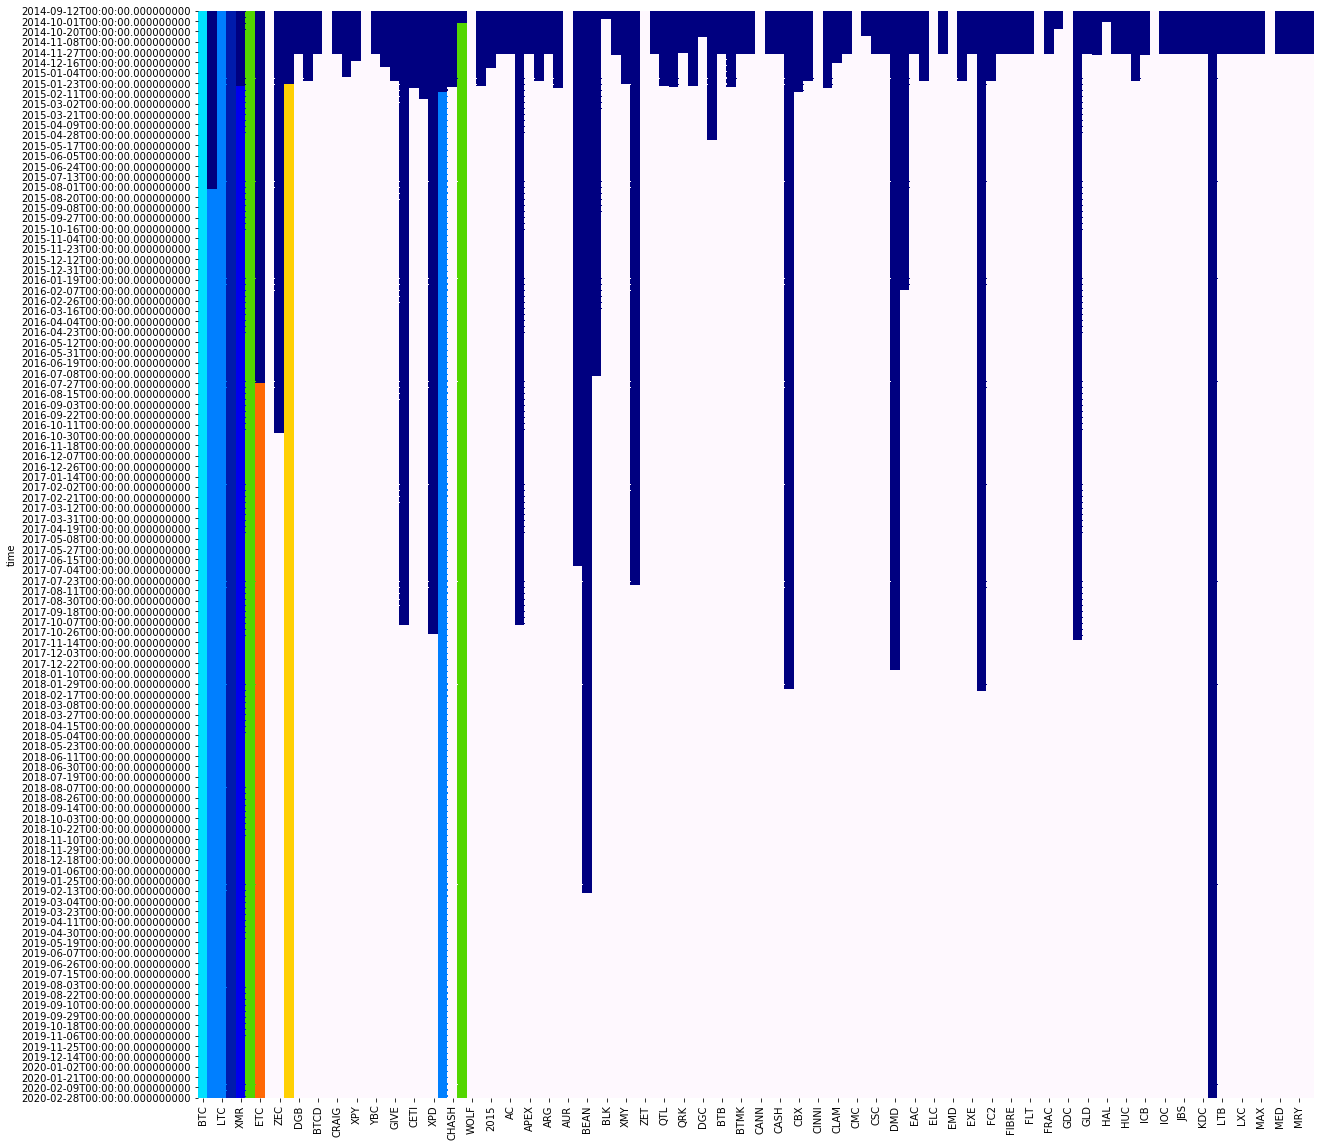

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt 

protocolFlags = protocolPlot[protocolPlot.Symbol.isin(list(allPrices.columns))].Flags.fillna(1)
protocolSources = pd.DataFrame([ allPrices.iloc[:, i].notnull().astype('uint8').replace(1, list(protocolFlags)[i]) for i in range(len(protocolFlags)) ]).T

fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(protocolSources, cmap="gist_ncar", cbar=False)

In [7]:
%%time
# All 3600+ Prices Parallelized
# Parallelization example inspired by https://blog.dominodatalab.com/simple-parallelization/

import time
import pandas as pd
import json, urllib.request
from joblib import Parallel, delayed
# pip install joblib
import multiprocessing
from tqdm import tqdm

inputs = range(len(data.Symbol)) # 3600+ collected here
def parallelPrices(i):
    base = data.Symbol[i]
    quote = "USD"
    limit = 2000
    columnName = 'close' # close high low open volumefrom volumeto
    
    try:
        
        # Download daily data
        # https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=2000
        url = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=" + base + "&tsym=" + quote + "&limit=" + str(limit)
        price = urllib.request.urlopen(url).read().decode('utf8')
        price = json.loads(price)
        price = pd.DataFrame(price['Data'])
        price = price.infer_objects()    
        price.time = [time.strftime('%Y-%m-%d', time.localtime(j)) for j in price.time]
        price = price.set_index('time')
        price = price[columnName]
        price.name = base
        price = price[price != 0] # Eliminates rows with zero vals
        return price
        
    except:
        pass

# Parallelized portion inspired by https://stackoverflow.com/questions/9786102/how-do-i-parallelize-a-simple-python-loop
num_cores = multiprocessing.cpu_count()
results = Parallel(n_jobs = num_cores)(delayed(parallelPrices)(i) for i in inputs)

# Combine different price series
allPrices = pd.DataFrame()
for i in range(len(results)):
    allPrices = allPrices.merge(pd.DataFrame(results[i]), how='outer', right_index = True, left_index = True)
    
allPrices.index = pd.to_datetime(allPrices.index)

# Wall time: 31min 59s

SyntaxError: 'continue' not properly in loop (<timed exec>, line 36)

ValueError: zero-size array to reduction operation minimum which has no identity

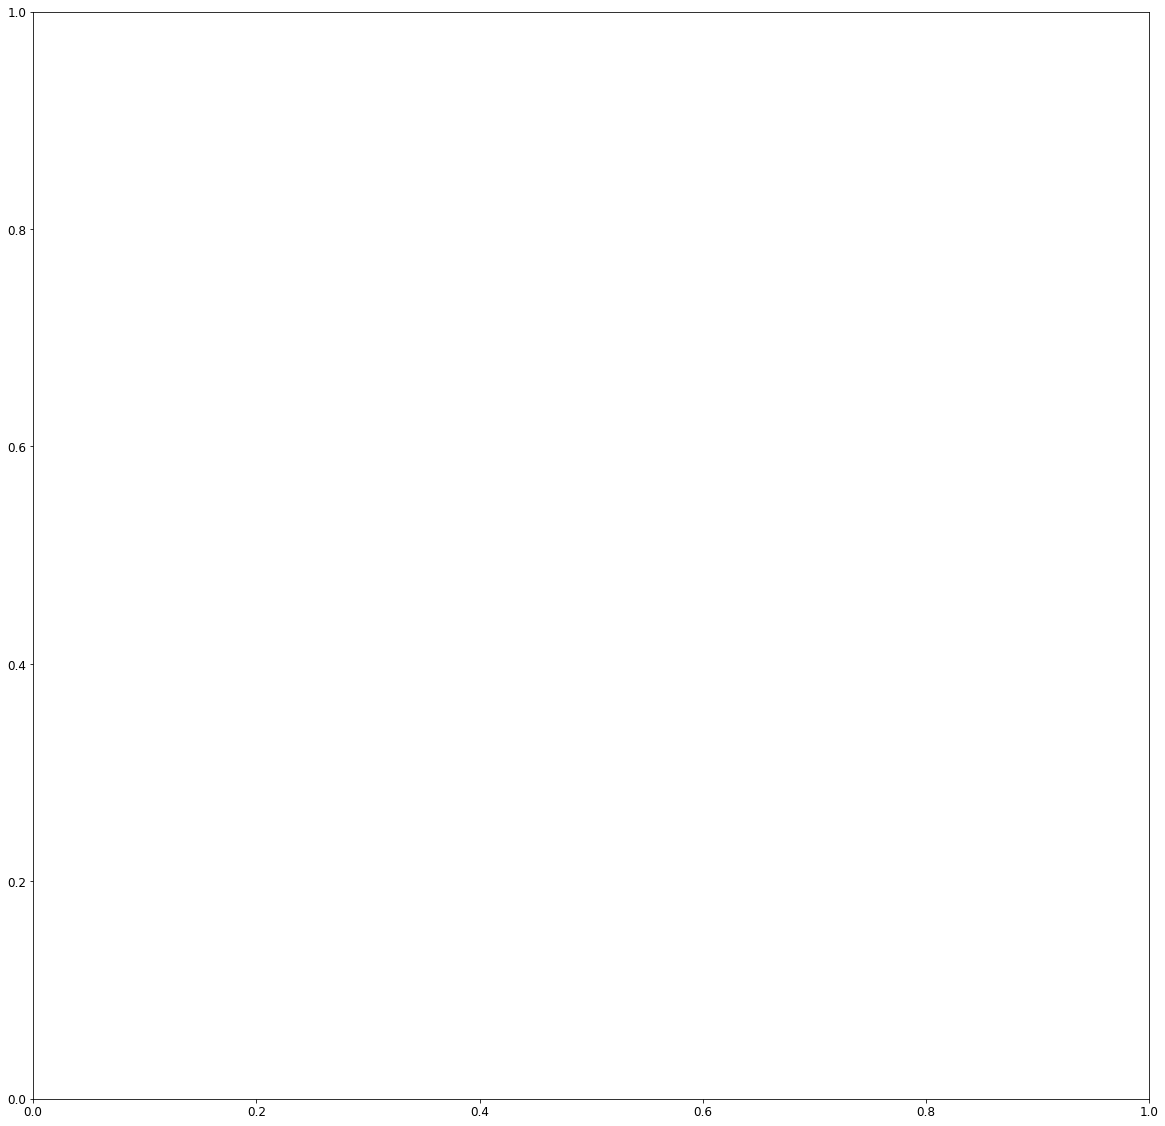

In [6]:
# All tokens/coins sorted by mkt cap
import seaborn as sns
from matplotlib import pyplot as plt 

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(allPrices.notnull(), cmap="ocean", cbar=False)

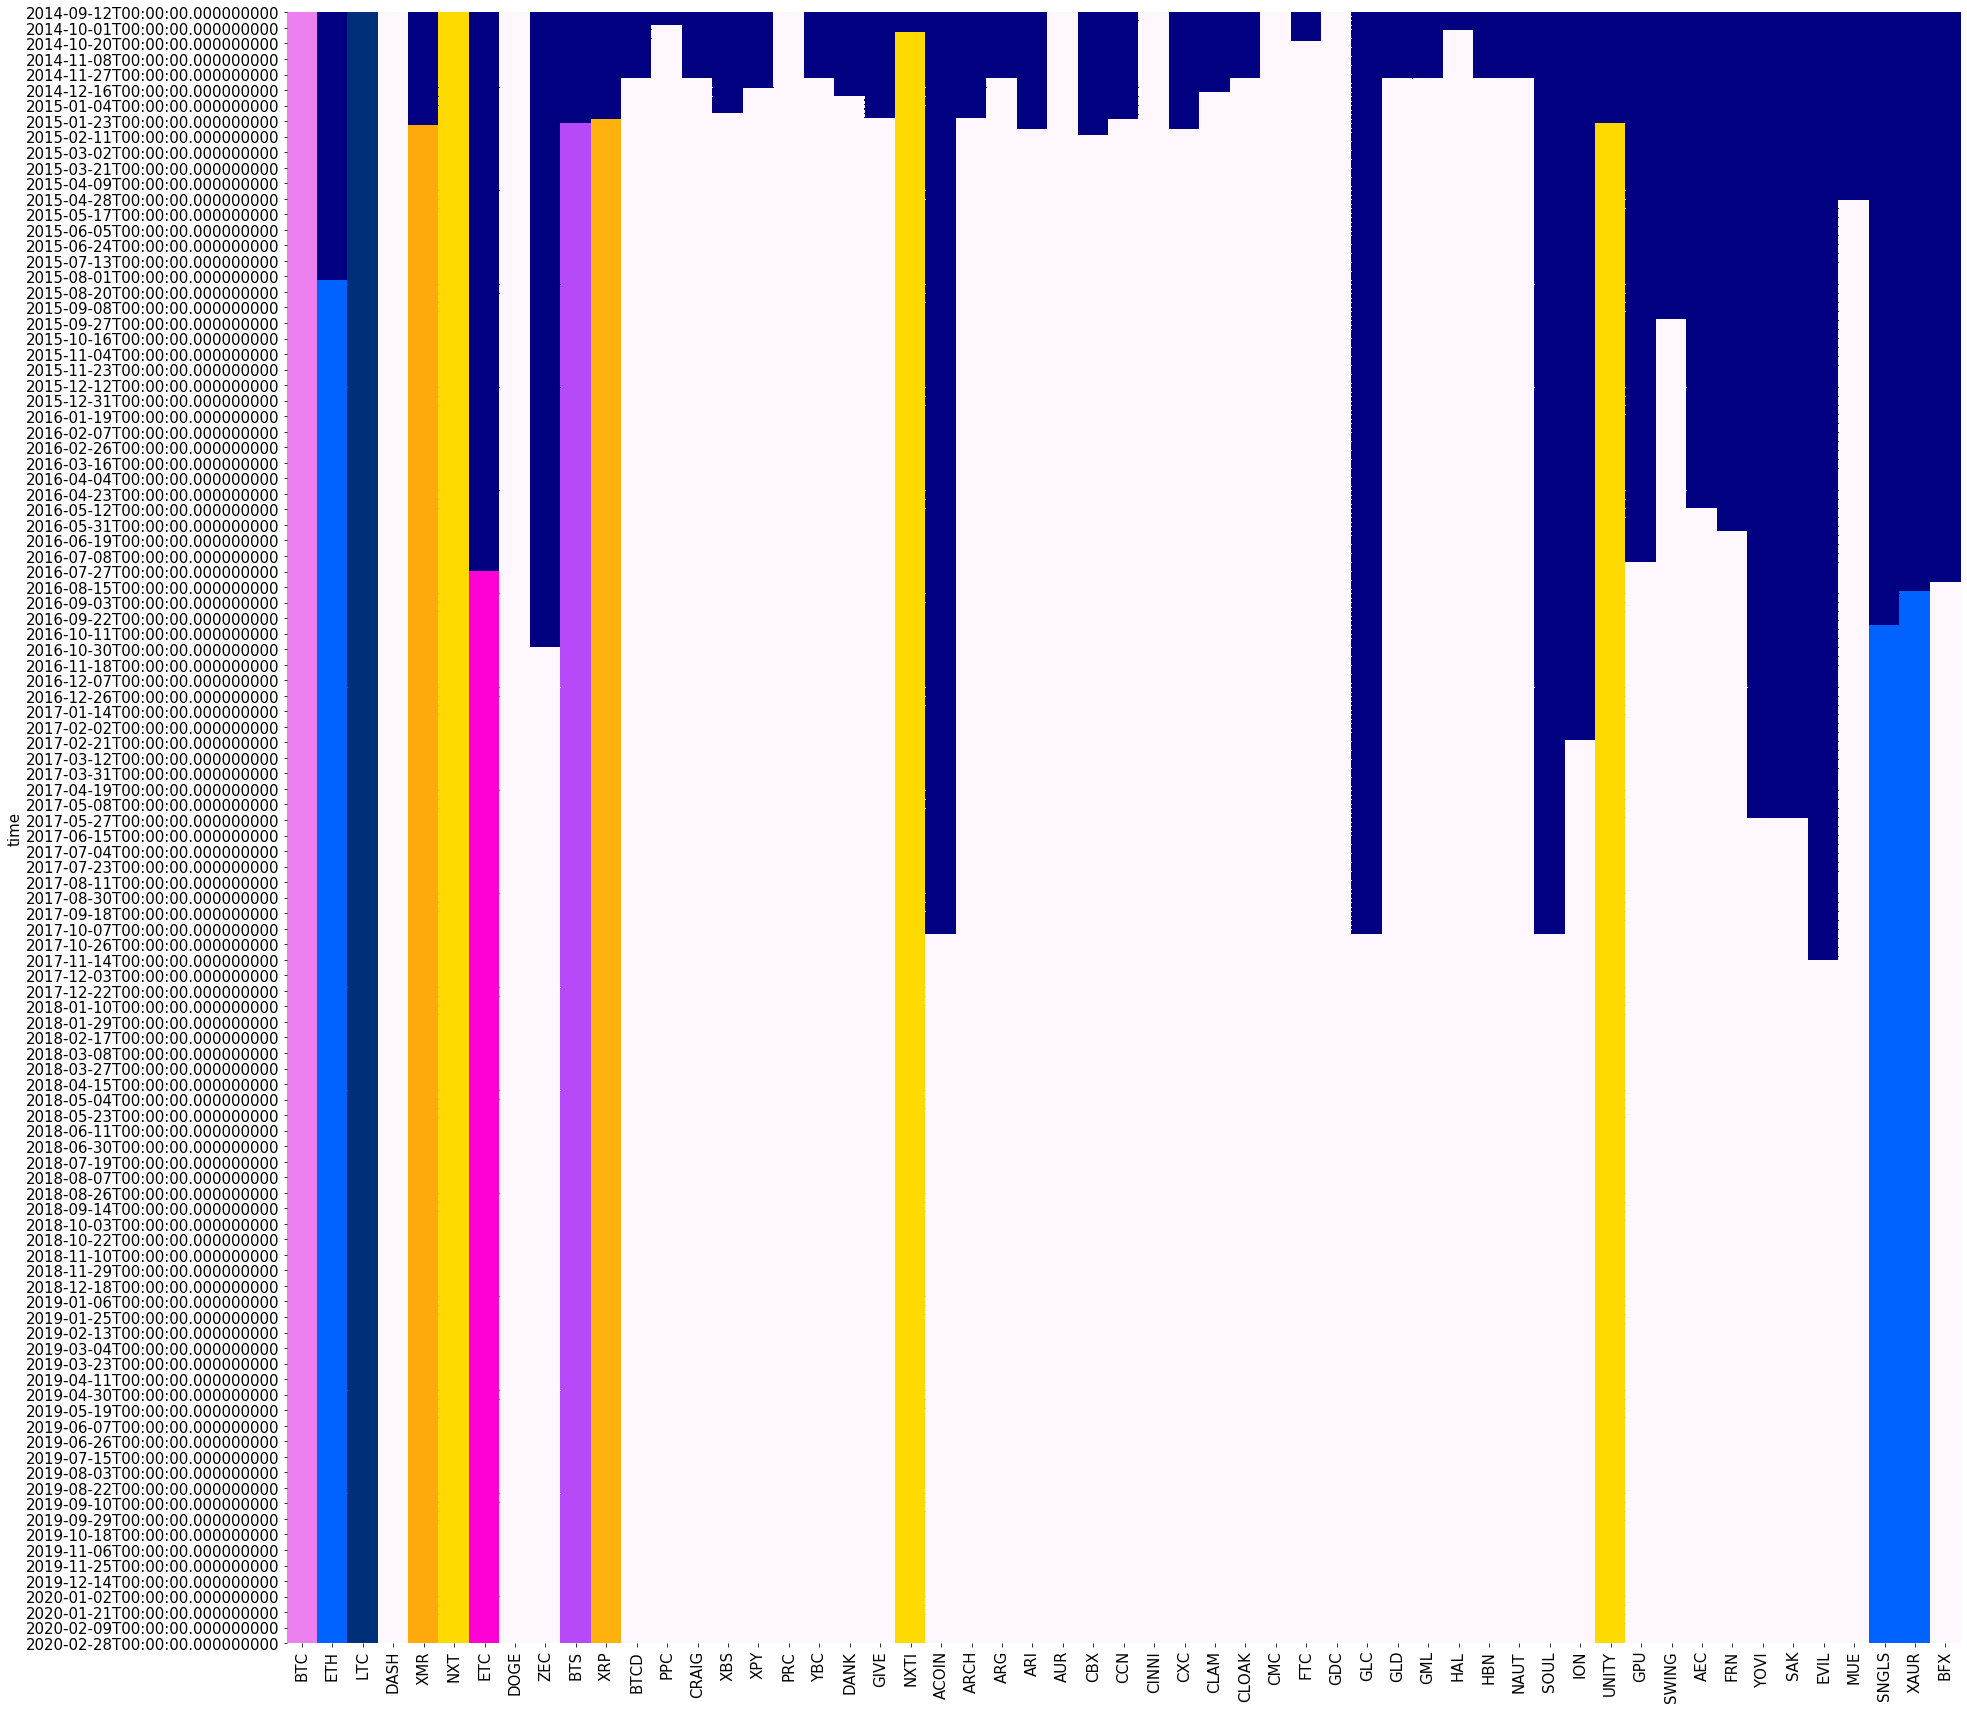

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt 

protocolFlags = protocolPlot[protocolPlot.Symbol.isin(list(allPrices.columns))].Flags.fillna(1)
protocolSources = pd.DataFrame([ allPrices.iloc[:, i].notnull().astype('uint8').replace(1, list(protocolFlags)[i]) for i in range(len(protocolFlags)) ]).T

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(30,30))   
sns.heatmap(protocolSources, cmap="gist_ncar", cbar=False)

In [27]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [24]:
## Load plotting function from gist
import requests
url = "https://gist.githubusercontent.com/ZeccaLehn/27f2b938b083d965086de7052d087b95/raw/02ed8b6e3320339088a7f6986b599928e1e4fcb3/multiTimeSeriesBokeh.py"
response = requests.get(url)
exec(response.text)
# print(response.text)

Loading BokehJS ...

In [29]:
df = allPrices.sample(n=50, axis=1)
multiTimeSeriesPlot(df, plotFeatures = list(df.columns))

ERROR:bokeh.core.validation.check:E-1006 (NON_MATCHING_DATA_SOURCES_ON_LEGEND_ITEM_RENDERERS): LegendItem.label is a field, but renderer data sources don't match: LegendItem(id='15416', ...)


In [31]:
df = allPrices.iloc[:, 0:10]
multiTimeSeriesPlot(df, plotFeatures = list(df.columns))

ERROR:bokeh.core.validation.check:E-1006 (NON_MATCHING_DATA_SOURCES_ON_LEGEND_ITEM_RENDERERS): LegendItem.label is a field, but renderer data sources don't match: LegendItem(id='22760', ...)
